In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Cours/Projet 9/projet/test/test de test/data.csv')

In [3]:
data.head()

,Unnamed: 0,Zone,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%)
0,0,Afghanistan,37171.921,-2.76,2033.8,1.479611,0.753257,0.508772
1,1,Afrique du Sud,57792.518,-0.23,13875.9,35.212171,28.844564,0.242682
2,2,Albanie,2882.740,0.37,13317.1,16.303933,4.509599,0.808511
3,3,Algérie,42228.408,-0.84,11630.7,6.251716,6.512204,0.007220
4,4,Allemagne,83124.418,0.59,53486.8,19.356527,18.213661,0.484186


In [4]:
data.set_index(data['Zone'], drop=True, inplace= True)

In [5]:
data= data.drop(data.columns[[0,1]],axis = 1)

Le but de l'étude de marché va être de déterminer quels sont les pays qui présentent le meilleur potentiel d'exportation pour l'entreprise La poule qui chante. Nous allons donc chercher à regrouper les dans des clusters:
- stables, le résultat ne doit pas varier lorsque le code est relancé.
- restreints, en effet l'entreprise cherche à identifier les meilleurs opportunités d'exportation, il est donc plus utiles d'avoir beaucoup de clusters avec peu d'inertie intra-clusters, donc des petits groupes de pays qui se ressemblent beaucoup. Qu'un faible nombre de clusters regroupant de nombreux pays qui sont "relativement similaires".

# K-means

L'un des paramètres qui va avoir le plus d'influence sur le résultat de l'algorithme K-means est le nombre de clusters choisi. Si les clusters ne sont pas "très" écartés, cet algorithme a tendance à produire des résultats qui ne sont pas stables. De plus, il est très sensible aux nombres de clusters que l'on cherche à créer. Nous allons donc prêter une intention particulière à ces deux points.

## Choix du nombre de clusters

### Coefficient de silhouette

Recherche du nombre de clusters optimals via l'étude du coefficient du silhouette.

In [6]:
data.head()

,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%)
Zone,,,,,,
Afghanistan,37171.921,-2.76,2033.8,1.479611,0.753257,0.508772
Afrique du Sud,57792.518,-0.23,13875.9,35.212171,28.844564,0.242682
Albanie,2882.740,0.37,13317.1,16.303933,4.509599,0.808511
Algérie,42228.408,-0.84,11630.7,6.251716,6.512204,0.007220
Allemagne,83124.418,0.59,53486.8,19.356527,18.213661,0.484186


In [7]:
# definition des composantes utilisées dans la PCA
Nb_comp = 6

In [8]:
X = data.values

Y = data.index.to_list()
X_norm = preprocessing.scale(X)

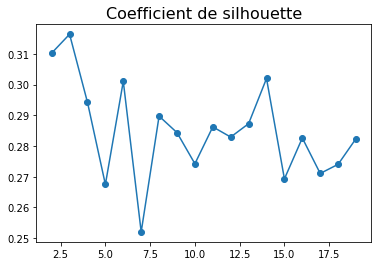

In [88]:
# création du graphique
silhouettes = []
for n_cluster in range(2,20):
  cls = cluster.KMeans(n_clusters=n_cluster, n_init = 10)
  cls.fit(X_norm)
  silh = metrics.silhouette_score(X_norm, cls.labels_)
  silhouettes.append(silh)
plt.plot(range(2,20), silhouettes, marker='o')
plt.title('Coefficient de silhouette', fontsize = 16)

plt.savefig('Coefficient de silhouette.png')

Le coefficient de silhoute semble suggérer 6 clusters.

In [10]:
# si fonctionne sans ça, à supprimer
pca = decomposition.PCA(n_components=Nb_comp)
pca.fit(X_norm)
X_projected = pca.transform(X_norm)

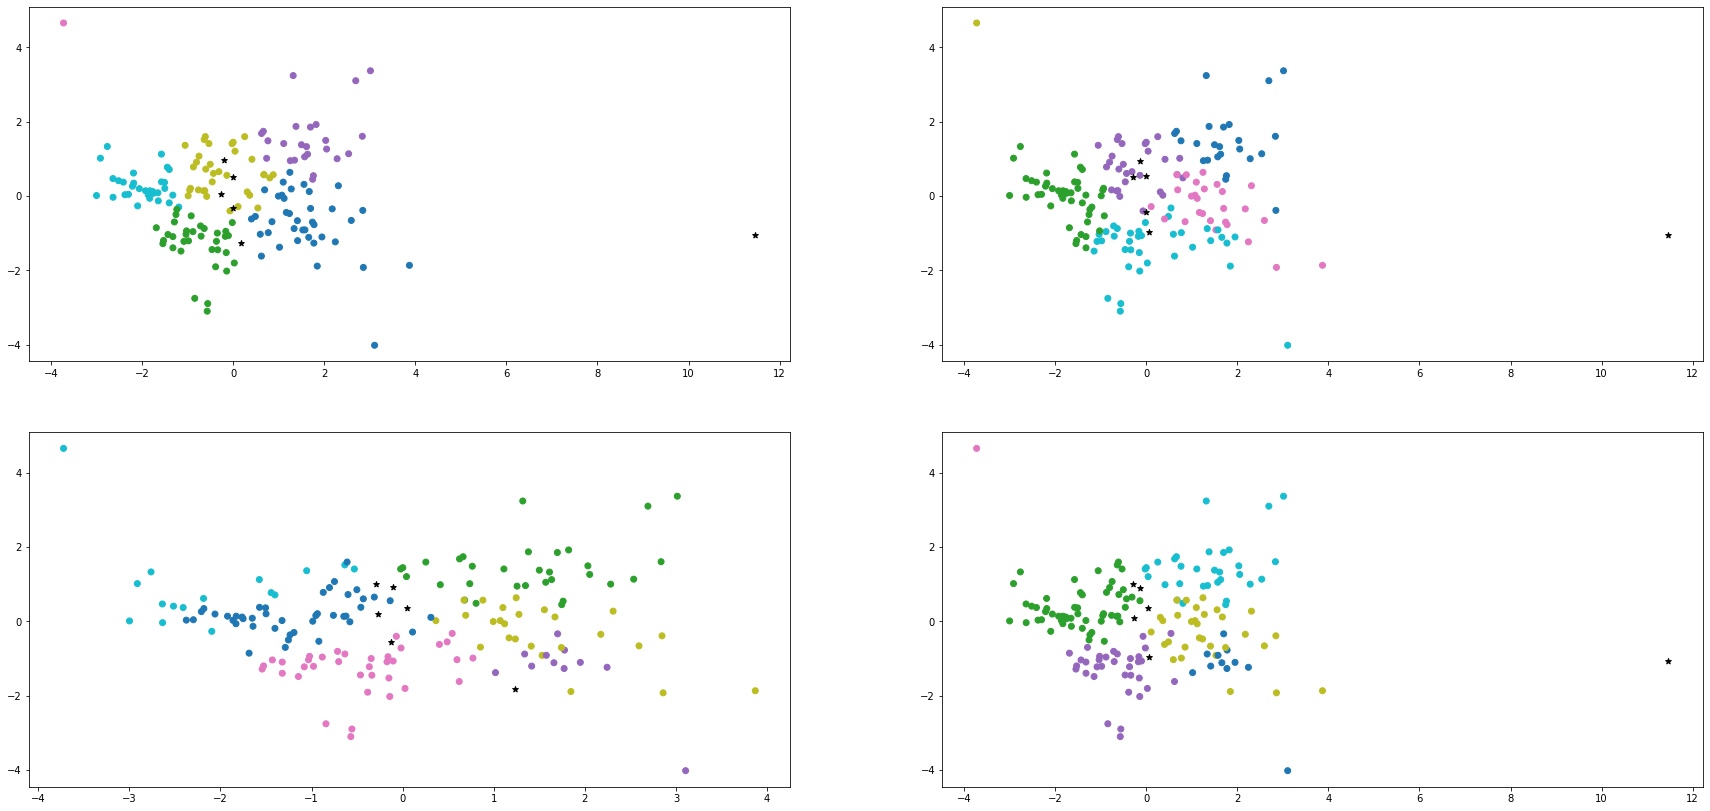

In [11]:
nb_cls = 6

plt.figure(figsize=(30,30))
plt.title('Projection des 6 clusters réalisés avec le K-means', fontsize = 16)

plt.subplot(4,2,1)
cls = cluster.KMeans(n_clusters=nb_cls, n_init = 'auto')
cls.fit(X_norm)
plt.scatter(X_projected[:,0], X_projected[:,1], c = cls.labels_, cmap='tab10')
plt.scatter(cls.cluster_centers_[:,0],cls.cluster_centers_[:,1], c= 'Black', marker = '*')


plt.subplot(4,2,2)
cls = cluster.KMeans(n_clusters=nb_cls, n_init = 'auto')
cls.fit(X_norm)
plt.scatter(X_projected[:,0], X_projected[:,1], c = cls.labels_, cmap='tab10')
plt.scatter(cls.cluster_centers_[:,0],cls.cluster_centers_[:,1], c= 'Black', marker = '*')


plt.subplot(4,2,3)
cls = cluster.KMeans(n_clusters=nb_cls, n_init = 'auto')
cls.fit(X_norm)
plt.scatter(X_projected[:,0], X_projected[:,1], c = cls.labels_, cmap='tab10')
plt.scatter(cls.cluster_centers_[:,0],cls.cluster_centers_[:,1], c= 'Black', marker = '*')

plt.subplot(4,2,4)
cls = cluster.KMeans(n_clusters=nb_cls, n_init = 'auto')
cls.fit(X_norm)
plt.scatter(X_projected[:,0], X_projected[:,1], c = cls.labels_, cmap='tab10')
plt.scatter(cls.cluster_centers_[:,0],cls.cluster_centers_[:,1], c= 'Black', marker = '*')

plt.savefig('K-means 6.png')
plt.show()

On constate que la méthode du K-means ne produit pas des clusters stables, nous allons essayer d'identifier si le nombre de clusters est erronné via "la méthode du coude".

### Elbow method

In [12]:
inertia = []
k_range = range(1,20)
for k in k_range:
  model = cluster.KMeans(n_clusters = k, n_init=10).fit(X_norm)
  inertia.append(model.inertia_)

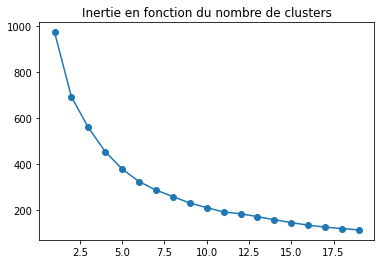

In [13]:
plt.plot(k_range, inertia, marker='o')
plt.title('Inertie en fonction du nombre de clusters')

plt.savefig('Inertie en fonction du nombre de clusters.jpg')

L'Elbow method ne permet pas d'identifier clairement un nombre de clusters optimal, même si a priori ce dernier se situerait entre 5 et 9. Comme la segmentation en 6 clusters ne donne pas de résultats probant, nous allons essayer avec 9 clusters.

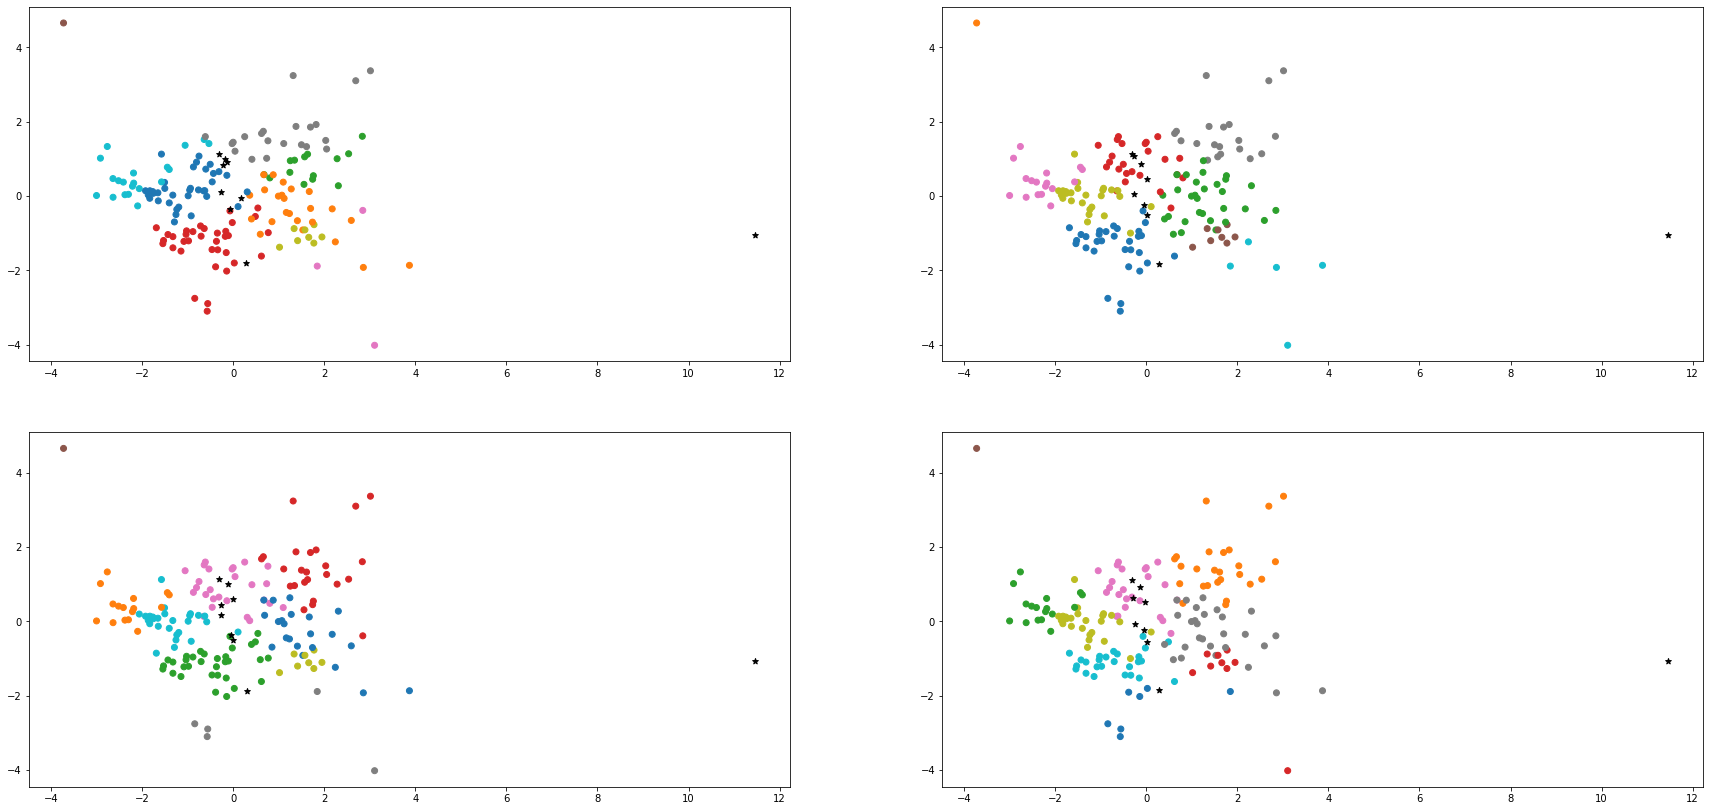

In [14]:
nb_cls = 9

plt.figure(figsize=(30,30))
plt.title('Projection des 9 clusters réalisés avec le K-means',fontsize = 16)

plt.subplot(4,2,1)
cls = cluster.KMeans(n_clusters=nb_cls, n_init = 'auto')
cls.fit(X_norm)
plt.scatter(X_projected[:,0], X_projected[:,1], c = cls.labels_, cmap='tab10')
plt.scatter(cls.cluster_centers_[:,0],cls.cluster_centers_[:,1], c= 'Black', marker = '*')


plt.subplot(4,2,2)
cls = cluster.KMeans(n_clusters=nb_cls, n_init = 'auto')
cls.fit(X_norm)
plt.scatter(X_projected[:,0], X_projected[:,1], c = cls.labels_, cmap='tab10')
plt.scatter(cls.cluster_centers_[:,0],cls.cluster_centers_[:,1], c= 'Black', marker = '*')


plt.subplot(4,2,3)
cls = cluster.KMeans(n_clusters=nb_cls, n_init = 'auto')
cls.fit(X_norm)
plt.scatter(X_projected[:,0], X_projected[:,1], c = cls.labels_, cmap='tab10')
plt.scatter(cls.cluster_centers_[:,0],cls.cluster_centers_[:,1], c= 'Black', marker = '*')

plt.subplot(4,2,4)
cls = cluster.KMeans(n_clusters=nb_cls, n_init = 'auto')
cls.fit(X_norm)
plt.scatter(X_projected[:,0], X_projected[:,1], c = cls.labels_, cmap='tab10')
plt.scatter(cls.cluster_centers_[:,0],cls.cluster_centers_[:,1], c= 'Black', marker = '*')

plt.savefig('Projection des 9 clusters réalisés avec le K-means.png')

Les résultats ne sont toujours pas stables avec 9 clusters.

## Démonstration des observations graphiques

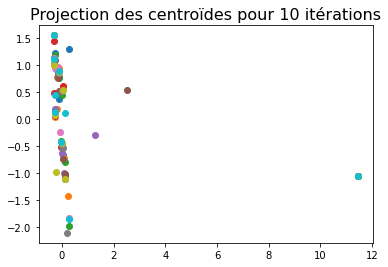

In [91]:
for i in range(10):
  cls = cluster.KMeans(n_clusters=9, n_init = 'auto')
  cls.fit(X_norm)
  plt.scatter(cls.cluster_centers_[:,0],cls.cluster_centers_[:,1])
plt.title('Projection des centroïdes pour 10 itérations', fontsize = 16)

plt.savefig('Projection des centroïdes pour 10 itérations.png')

## Conclusion K-means

La segmenation par l'algorithme K-means ne produit pas de clusters stables, il n'est donc pas pertinent de l'utiliser pour ces données.

# Classification Ascendante Hiérarchique

In [16]:
data = pd.read_csv('/content/drive/MyDrive/Cours/Projet 9/projet/test/test de test/data.csv')

In [17]:
data.head()

,Unnamed: 0,Zone,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%)
0,0,Afghanistan,37171.921,-2.76,2033.8,1.479611,0.753257,0.508772
1,1,Afrique du Sud,57792.518,-0.23,13875.9,35.212171,28.844564,0.242682
2,2,Albanie,2882.740,0.37,13317.1,16.303933,4.509599,0.808511
3,3,Algérie,42228.408,-0.84,11630.7,6.251716,6.512204,0.007220
4,4,Allemagne,83124.418,0.59,53486.8,19.356527,18.213661,0.484186


In [18]:
data.set_index(data['Zone'], drop=True, inplace= True)

In [19]:
data= data.drop(data.columns[[0,1]],axis = 1)

## Réalisation d'un dendrogramme

Normalisation des données:

In [20]:
y = data.index

In [21]:
scaler= preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled = pd.DataFrame(X_scaled, index = data.index,columns=data.columns)

Réalisation du screeplot

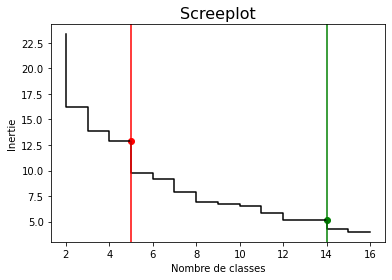

In [22]:
#générer la matrice des liens
Z = linkage(X_scaled.iloc[:,0:7],method='ward', metric='euclidean')

last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(2, len(last) + 2)

plt.step(idxs, last_rev, c="black")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")

nombre = 5
plt.scatter(idxs[np.where(idxs==5)], last_rev[np.where(idxs==5)], c="red")
plt.axvline(idxs[np.where(idxs==5)], c="red")

plt.scatter(idxs[np.where(idxs==14)], last_rev[np.where(idxs==14)], c="green")
plt.axvline(idxs[np.where(idxs==14)], c="green")
plt.title('Screeplot', fontsize = 16)

plt.savefig('Screeplot.jpg')
plt.show()

On voit que la diminution de l'inertie devient négligeable au-delà de 5 catégories. Cependant, on peut constater une nouvelle baisse sensible de la variance à partir de 14 clusters. Hors, comme il s'agit d'étudier des opportunités d'exportation, il est plus pertinent d'avoir un nombre de clusters élevés comprenant une forte homogénéité entre les individus plutôt qu'un petit nombre de clusters avec une variance élevée. C'est donc ce nombre de 14 clusters que nous allons conserver.

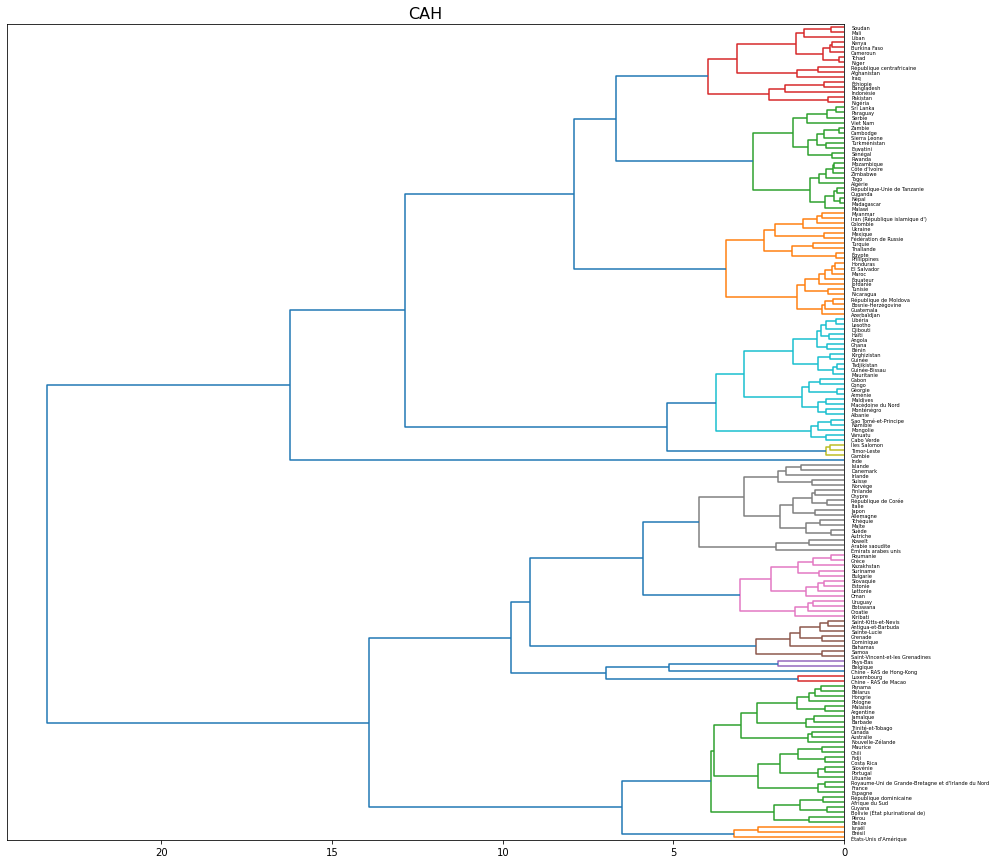

In [23]:
# Affichage du dendrogramme
plt.figure(figsize=(15,15))
plt.title("CAH", fontsize = 16)

dendrogram(Z,labels=data.index,orientation='left',color_threshold=5)

plt.savefig('CAH.jpg')
plt.show()

## Récupération des clusters

Segmentation des données normalisées

In [24]:
cah = AgglomerativeClustering(n_clusters=14, linkage="ward")

In [25]:
cah.fit(X_scaled)

AgglomerativeClustering(n_clusters=14)

In [26]:
# Création des labels
dd = {i:j for i,j in enumerate(list("ABCDEFGHIJKLMN"))}
labels = [dd[i] for i in cah.labels_]


In [27]:
X_scaled["cluster"] = labels

In [28]:
X_scaled['cluster_num'] = cah.labels_

In [29]:
X_scaled.head()

,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%),cluster,cluster_num
Zone,,,,,,,,
Afghanistan,0.008576,-3.074964,-0.887952,-1.177835,-0.896835,0.093084,B,1
Afrique du Sud,0.188156,-0.196636,-0.332198,0.956943,0.720080,-0.416636,E,4
Albanie,-0.290040,0.485971,-0.358422,-0.239672,-0.680623,0.667261,C,2
Algérie,0.052612,-0.890620,-0.437566,-0.875830,-0.565354,-0.867684,J,9
Allemagne,0.408766,0.736261,1.526756,-0.046487,0.108173,0.045988,A,0


In [30]:
# Récupération des noms de clusters par pays
clusters_name = X_scaled.iloc[:,-2:]

In [31]:
clusters_name.head()

,cluster,cluster_num
Zone,,
Afghanistan,B,1
Afrique du Sud,E,4
Albanie,C,2
Algérie,J,9
Allemagne,A,0


## Rajout des clusters dans le DF data

In [32]:
data_2 = data.merge(clusters_name, on = data.index)

In [33]:
data_2.rename(columns={"key_0":"Zone"}, inplace= True)

In [34]:
data_2.head()

,Zone,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%),cluster,cluster_num
0,Afghanistan,37171.921,-2.76,2033.8,1.479611,0.753257,0.508772,B,1
1,Afrique du Sud,57792.518,-0.23,13875.9,35.212171,28.844564,0.242682,E,4
2,Albanie,2882.740,0.37,13317.1,16.303933,4.509599,0.808511,C,2
3,Algérie,42228.408,-0.84,11630.7,6.251716,6.512204,0.007220,J,9
4,Allemagne,83124.418,0.59,53486.8,19.356527,18.213661,0.484186,A,0


In [35]:
# affichage des différents clusters
liste = data_2['cluster'].unique()
for i in liste:
  display(data_2.loc[data_2['cluster']==i, ['Zone','cluster']])

,Zone,cluster
0,Afghanistan,B
14,Bangladesh,B
23,Burkina Faso,B
28,Cameroun,B
64,Indonésie,B
66,Iraq,B
75,Kenya,B
81,Liban,B
90,Mali,B
102,Niger,B


,Zone,cluster
1,Afrique du Sud,E
8,Argentine,E
10,Australie,E
15,Barbade,E
17,Belize,E
18,Bolivie (État plurinational de),E
24,Bélarus,E
29,Canada,E
30,Chili,E
36,Costa Rica,E


,Zone,cluster
2,Albanie,C
5,Angola,C
9,Arménie,C
25,Bénin,C
26,Cabo Verde,C
35,Congo,C
40,Djibouti,C
50,Gabon,C
52,Ghana,C
56,Guinée,C


,Zone,cluster
3,Algérie,J
27,Cambodge,J
38,Côte d'Ivoire,J
45,Eswatini,J
86,Madagascar,J
88,Malawi,J
98,Mozambique,J
106,Népal,J
108,Ouganda,J
111,Paraguay,J


,Zone,cluster
4,Allemagne,A
7,Arabie saoudite,A
11,Autriche,A
33,Chypre,A
39,Danemark,A
47,Finlande,A
67,Irlande,A
68,Islande,A
70,Italie,A
72,Japon,A


,Zone,cluster
6,Antigua-et-Barbuda,G
13,Bahamas,G
41,Dominique,G
53,Grenade,G
125,Saint-Kitts-et-Nevis,G
126,Saint-Vincent-et-les Grenadines,G
127,Sainte-Lucie,G
128,Samoa,G


,Zone,cluster
12,Azerbaïdjan,D
19,Bosnie-Herzégovine,D
34,Colombie,D
42,El Salvador,D
49,Fédération de Russie,D
55,Guatemala,D
61,Honduras,D
65,Iran (République islamique d'),D
73,Jordanie,D
92,Maroc,D


,Zone,cluster
16,Belgique,H
112,Pays-Bas,H


,Zone,cluster
20,Botswana,F
22,Bulgarie,F
37,Croatie,F
44,Estonie,F
54,Grèce,F
74,Kazakhstan,F
77,Kiribati,F
80,Lettonie,F
107,Oman,F
117,Roumanie,F


,Zone,cluster
21,Brésil,K
69,Israël,K
159,États-Unis d'Amérique,K


,Zone,cluster
31,Chine - RAS de Hong-Kong,N


,Zone,cluster
32,Chine - RAS de Macao,I
84,Luxembourg,I


,Zone,cluster
51,Gambie,M
144,Timor-Leste,M
161,Îles Salomon,M


,Zone,cluster
63,Inde,L


# ACP

Ici l'ACP va nous permettre de réaliser une visualisation des clusters et non de réduire le nombre de variable pour améliorer le temps de clalcul. Donc si une visualisation des données sur un plan 2D permet de visualiser plus de 50% de la variance elle pourra être suffisante.

## Observation de la correlation des variables entre elles

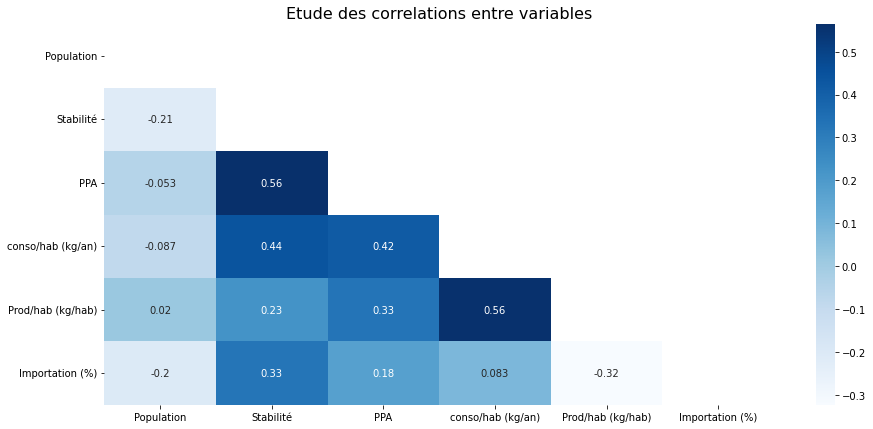

In [36]:
plt.figure(figsize = (15,7))
mask = np.triu(np.ones_like(data.corr(),dtype = bool))
sns.heatmap(data.corr(), mask=mask, annot = True, cmap ="Blues")
plt.title('Etude des correlations entre variables',fontsize = 16)

plt.savefig("Etude des correlations.jpg")
plt.show()

Constats:
- Les variables "Stabilité", "PPA" et "conso/hab" sont corréllées positivement, en effet les pays les plus riches (PPA élevé) on plus de probabilité d'avoir une stabilité élevé et une consommation de viande élevée.

- Variable "Prod/hab" et "Importation" sont corrélées négativement, les pays qui produisent beaucoup on moins d'importation.


## Préparation ACP 

In [37]:
data.head()

,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%)
Zone,,,,,,
Afghanistan,37171.921,-2.76,2033.8,1.479611,0.753257,0.508772
Afrique du Sud,57792.518,-0.23,13875.9,35.212171,28.844564,0.242682
Albanie,2882.740,0.37,13317.1,16.303933,4.509599,0.808511
Algérie,42228.408,-0.84,11630.7,6.251716,6.512204,0.007220
Allemagne,83124.418,0.59,53486.8,19.356527,18.213661,0.484186


In [38]:
X = data.values

In [39]:
std = preprocessing.StandardScaler().fit(X)

In [40]:
X_scaled = std.transform(X)

## Etude de la variance

In [41]:
pca = decomposition.PCA(n_components=6)

In [42]:
pca.fit(X_scaled)

PCA(n_components=6)

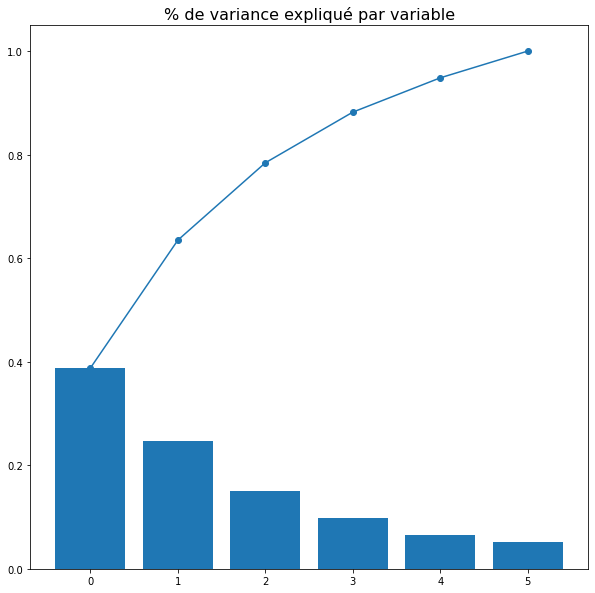

In [43]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.bar(x = range(len(pca.explained_variance_ratio_)),height=pca.explained_variance_ratio_)
plt.title('% de variance expliqué par variable', fontsize = 16)

plt.savefig('Variance expliquée.jpg')

On constate que 2 variables suffisent à exprimer plus de 60% de la variance, nous pouvons donc réaliser une ACP à deux variables pour visualiser nos données.

## Visualisation graphique des données grâce à l'ACP

In [44]:
pca = decomposition.PCA(n_components=2)

In [45]:
pca.fit(X_scaled)

PCA(n_components=2)

In [46]:
print(pca.explained_variance_ratio_.cumsum())

[0.387875   0.63488302]


In [47]:
X_projected = pca.transform(X_scaled)

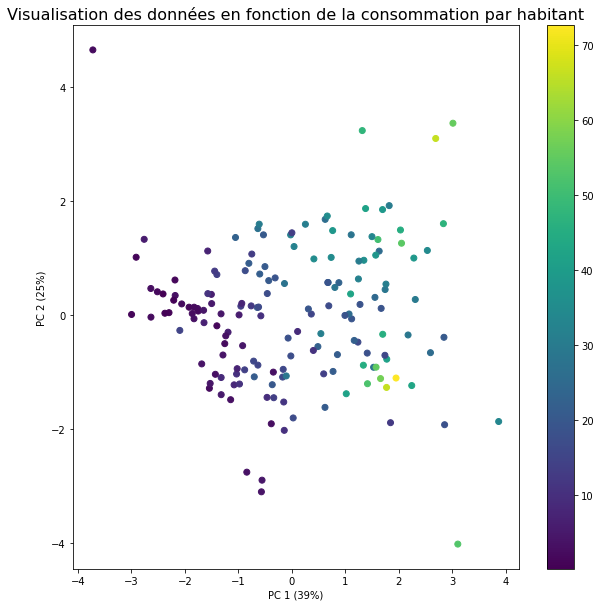

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(X_projected[:,0], X_projected[:,1], c= data['conso/hab (kg/an)'])
plt.colorbar()
plt.xlabel('PC 1 ({:.0%})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC 2 ({:.0%})'.format(pca.explained_variance_ratio_[1]))
plt.title('Visualisation des données en fonction de la consommation par habitant', fontsize = 16)

plt.savefig('visu_consohab.jpg')

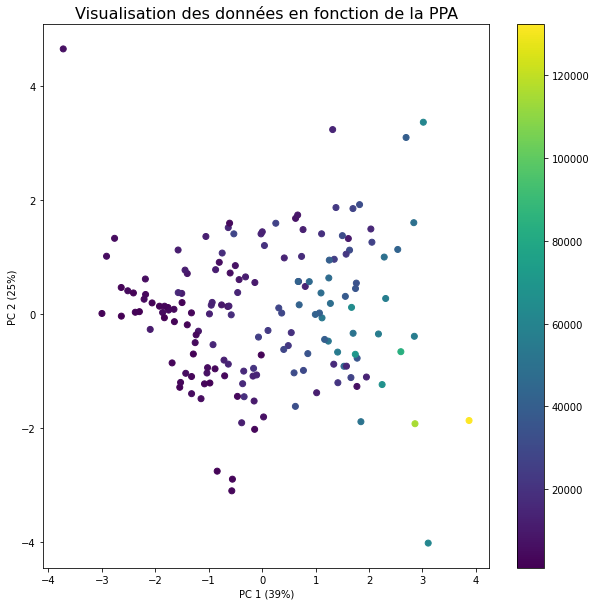

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(X_projected[:,0], X_projected[:,1], c= data['PPA'])
plt.colorbar()
plt.xlabel('PC 1 ({:.0%})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC 2 ({:.0%})'.format(pca.explained_variance_ratio_[1]))
plt.title('Visualisation des données en fonction de la PPA', fontsize = 16)

plt.savefig("visu_PPA.jpg")

## Représentation 2D

In [50]:
Components = pca.components_

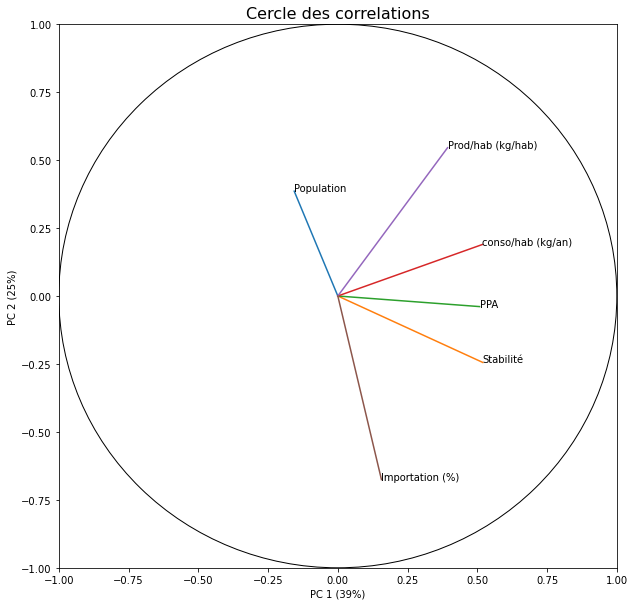

In [51]:
# création de la figure
figure, axes = plt.subplots(figsize=(10,10))
plt.axis([-1,1,-1,1])
circle = plt.Circle((0,0), radius=1, fill = False)

# création des labels
for i, (x,y) in enumerate(zip(Components[0,:],Components[1,:])):
  plt.plot([0,x], [0,y])
  plt.text(x,y,data.columns[i])

# affichage
axes.add_artist(circle)
plt.xlabel('PC 1 ({:.0%})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC 2 ({:.0%})'.format(pca.explained_variance_ratio_[1]))
plt.title("Cercle des correlations", fontsize=16)

plt.savefig('Cercle des correlations.jpg')
plt.show()


On constate que l'axe horizontal va principalement représenter la "conso/hab", la "PPA", et la "stabilité" en d'autres termes, la "richesse du pays".

L'axe verticale va représenter une aggrégation entre les imporatations et la production (qui ont une corrélation négative) ainsi que la population. On pourrait résumer cette variable comme "l'auto-suffisance" du pays

In [52]:
# création du DF regroupant les données normalisées
temp = pd.DataFrame(X_projected)

# récupération de l'association cluster/pays
Zone = data_2['Zone'].to_list()
clust = data_2[['Zone','cluster','cluster_num']]
temp['Zone'] = Zone

# création du DF
temp = temp.merge(clust)
temp = temp.set_index('Zone', drop =True)

In [53]:
display(temp)

,0,1,cluster,cluster_num
Zone,,,,
Afghanistan,-2.998487,0.014390,B,1
Afrique du Sud,0.413420,0.989244,E,4
Albanie,-0.171788,-1.084248,C,2
Algérie,-1.505021,0.366871,J,9
Allemagne,1.119986,-0.062754,A,0
...,...,...,...,...
Émirats arabes unis,2.244495,-1.232983,A,0
Équateur,-0.311372,0.656196,D,3
États-Unis d'Amérique,3.015519,3.370819,K,10


In [54]:
# Isolation des données relatives à la France pour comparer avec le marché de l'entreprise
Fr = temp.loc[temp.index == 'France',[0,1]]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


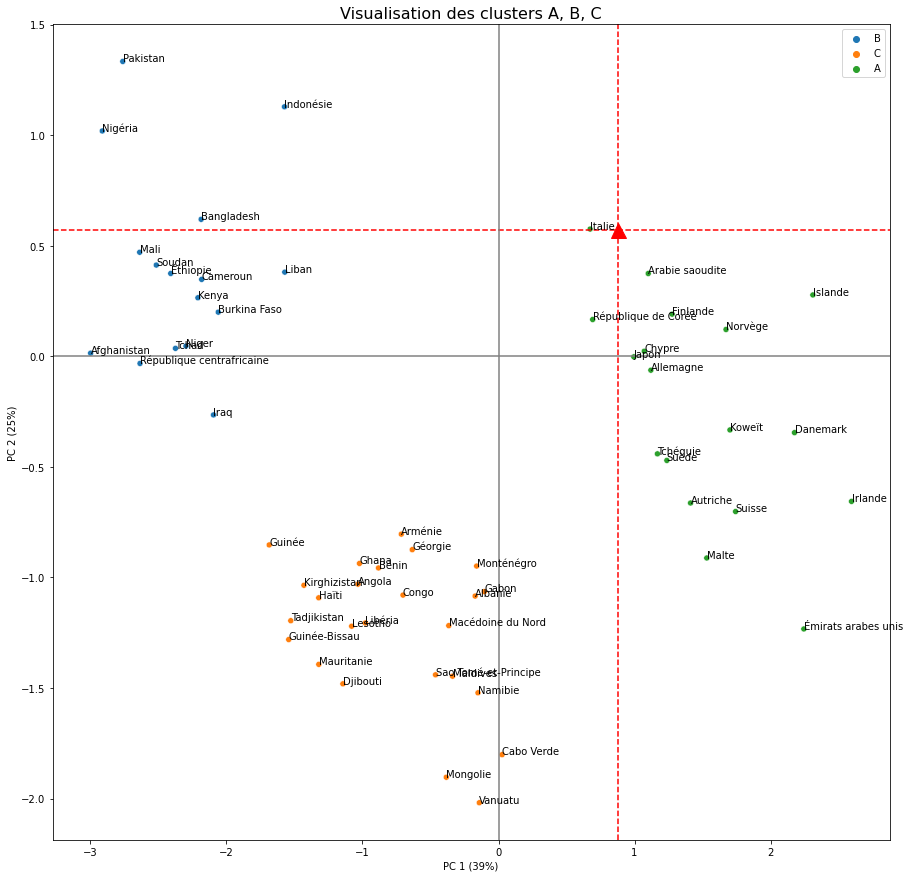

In [55]:
# séléction des données
df= temp.loc[(temp['cluster']== 'A') |(temp['cluster']== 'B') |(temp['cluster']== 'C'),:]

# création de la figure
plt.figure(figsize=(15,15))
sns.scatterplot(df[0], df[1], hue = df['cluster'])

# visualisation du point de comparaison
plt.plot(Fr[0].values, Fr[1].values, marker = '^', c= 'red', markersize=15)
plt.axvline(x=Fr[0].values,color='red', linestyle='--')
plt.axhline(y=Fr[1].values,color='red', linestyle='--')

# affichage de l'abscisse et de l'ordonnée 
plt.axvline(x=0,color='gray')
plt.axhline(y=0,color='gray')


#création des labels
for i, (x,y) in enumerate(zip(df[0], df[1])):
  plt.text(x,y,df.index[i])

# affichage légende et libellés
plt.xlabel('PC 1 ({:.0%})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC 2 ({:.0%})'.format(pca.explained_variance_ratio_[1]))
plt.title("Visualisation des clusters A, B, C", fontsize=16)
plt.legend()

plt.savefig('visu ABC.jpg')
plt.show()

Le groupe A semble être un bon candidat à l'exportation.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


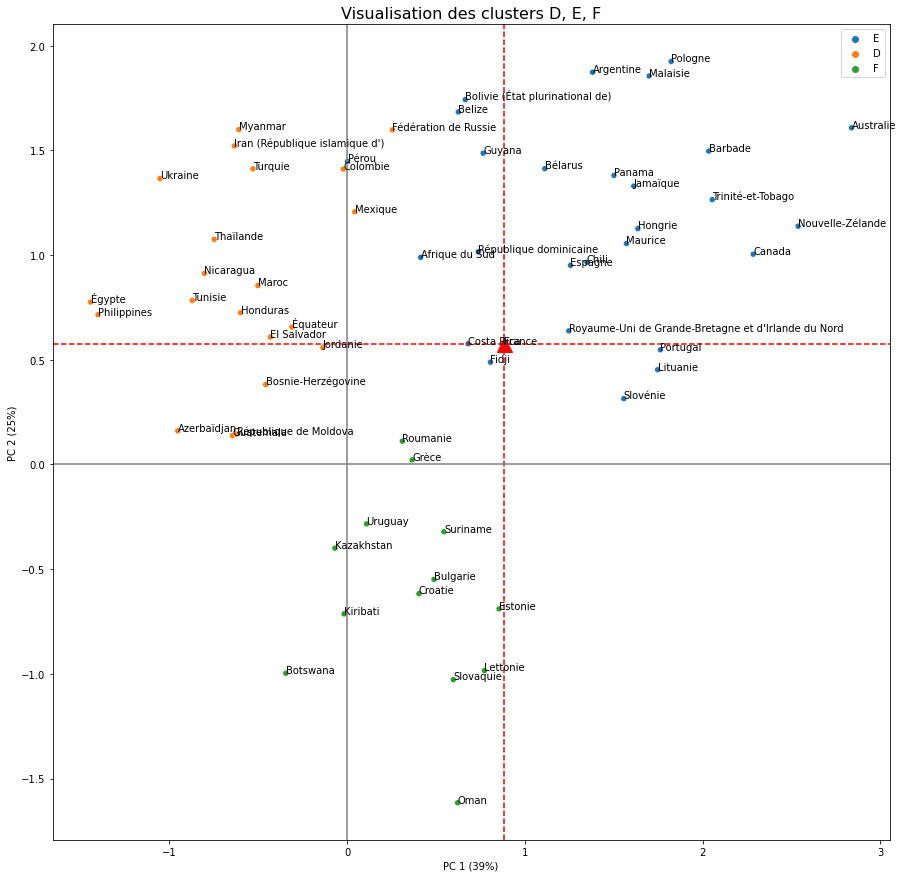

In [56]:
# sélection des données
df = temp.loc[(temp['cluster']== 'D') |(temp['cluster']== 'E') |(temp['cluster']== 'F'),:]

# création de la figure
plt.figure(figsize=(15,15))
sns.scatterplot(df[0], df[1], hue = df['cluster'])

# visualisation du point de comparaison
plt.plot(Fr[0].values, Fr[1].values, marker = '^', c= 'red', markersize=15)
plt.axvline(x=Fr[0].values,color='red', linestyle='--')
plt.axhline(y=Fr[1].values,color='red', linestyle='--')

# affichage de l'abscisse et de l'ordonnée 
plt.axvline(x=0,color='gray')
plt.axhline(y=0,color='gray')


#création des labels
for i, (x,y) in enumerate(zip(df[0], df[1])):
  plt.text(x,y,df.index[i])

# affichage légende et libellés
plt.xlabel('PC 1 ({:.0%})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC 2 ({:.0%})'.format(pca.explained_variance_ratio_[1]))
plt.title("Visualisation des clusters D, E, F", fontsize=16)
plt.legend()

plt.savefig('Visu DEF.jpg')
plt.show()

Les groupes D, E, F, ne semblent pas être de bons candidats à l'exportation.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


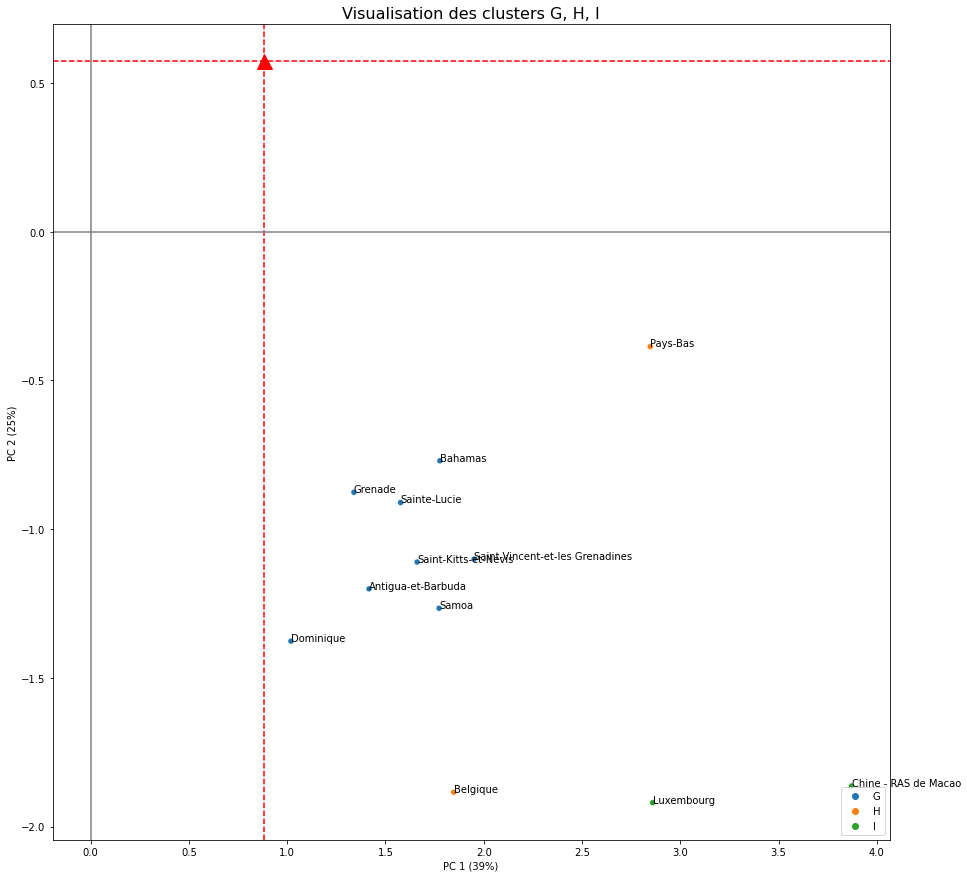

In [57]:
# Séléction des données
df = temp.loc[(temp['cluster']== 'G') |(temp['cluster']== 'H')|(temp['cluster']== 'I'),:]

# création de la figure
plt.figure(figsize=(15,15))
sns.scatterplot(df[0], df[1], hue = df['cluster'])

# visualisation du point de comparaison
plt.plot(Fr[0].values, Fr[1].values, marker = '^', c= 'red', markersize=15)
plt.axvline(x=Fr[0].values,color='red', linestyle='--')
plt.axhline(y=Fr[1].values,color='red', linestyle='--')

# affichage de l'abscisse et de l'ordonnée 
plt.axvline(x=0,color='gray')
plt.axhline(y=0,color='gray')


#création des labels
for i, (x,y) in enumerate(zip(df[0], df[1])):
  plt.text(x,y,df.index[i])

# affichage légende et libellés
plt.xlabel('PC 1 ({:.0%})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC 2 ({:.0%})'.format(pca.explained_variance_ratio_[1]))
plt.title("Visualisation des clusters G, H, I", fontsize=16)
plt.legend()

plt.savefig('visu GHI.jpg')
plt.show()

Les groupes G, H, I, semblent être des bons candidats à l'exportation.

In [58]:
temp['cluster'].unique()

array(['B', 'E', 'C', 'J', 'A', 'G', 'D', 'H', 'F', 'K', 'N', 'I', 'M',
       'L'], dtype=object)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


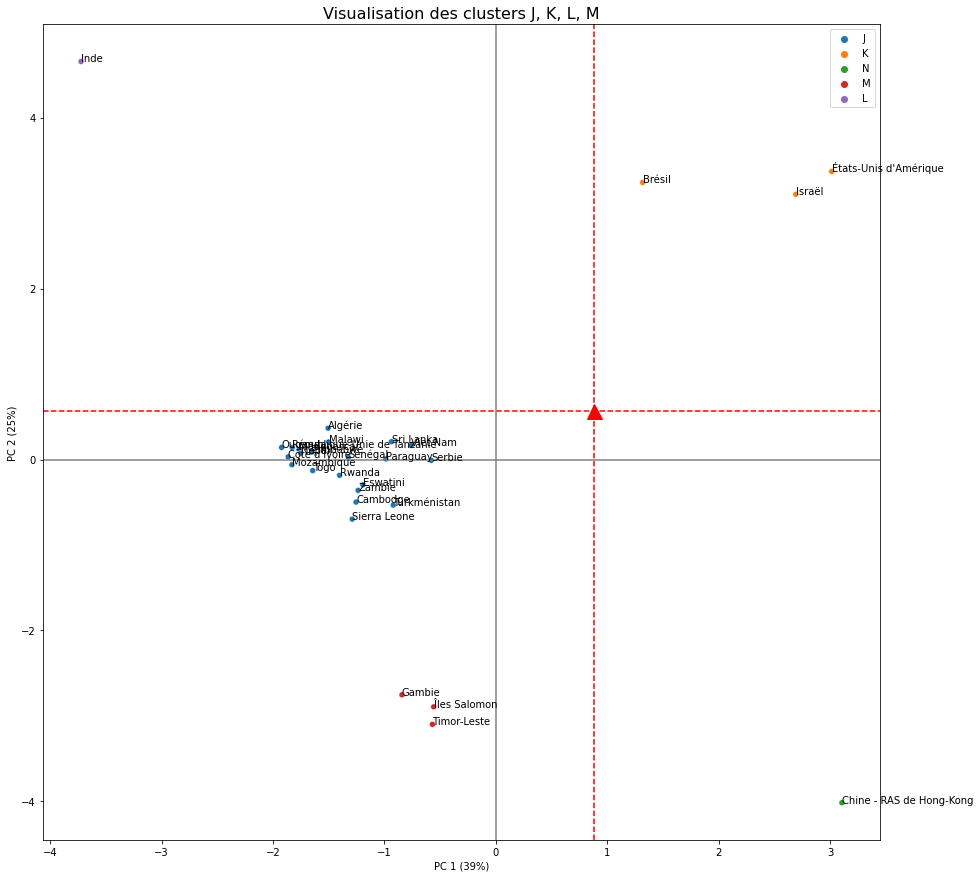

In [59]:
# sélection des données
df = temp.loc[(temp['cluster']== 'J') |(temp['cluster']== 'K')|(temp['cluster']== 'L')|(temp['cluster']== 'M')|(temp['cluster']== 'N'),:]

# création de la figure
plt.figure(figsize=(15,15))
sns.scatterplot(df[0], df[1], hue = df['cluster'])

# visualisation du point de comparaison
plt.plot(Fr[0].values, Fr[1].values, marker = '^', c= 'red', markersize=15)
plt.axvline(x=Fr[0].values,color='red', linestyle='--')
plt.axhline(y=Fr[1].values,color='red', linestyle='--')

# affichage de l'abscisse et de l'ordonnée 
plt.axvline(x=0,color='gray')
plt.axhline(y=0,color='gray')


#création des labels
for i, (x,y) in enumerate(zip(df[0], df[1])):
  plt.text(x,y,df.index[i])

# affichage légende et libellés
plt.xlabel('PC 1 ({:.0%})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC 2 ({:.0%})'.format(pca.explained_variance_ratio_[1]))
plt.title("Visualisation des clusters J, K, L, M", fontsize=16)
plt.legend()

plt.savefig('visu JKLM.jpg')
plt.show()

Le groupe N semble être un bon candidat à l'exportation.

## Conclusion visualisation via ACP de la CAH

L'ACP suggèrent de privilégier les groupes:
A, G, H, I et N.

# Conclusion : Etudes des clusters et sélection des pays

Ici le but ne va plus être d'observer chacun des individues mais plutôt les clusters. Grâce à l'étude de leurs médianes.

Pour réaliser une comparaison entre les clusters, nous utiliserons comme point de référence, le marché actuel de l'entreprise, donc la France.

In [60]:
data_2.head()

,Zone,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%),cluster,cluster_num
0,Afghanistan,37171.921,-2.76,2033.8,1.479611,0.753257,0.508772,B,1
1,Afrique du Sud,57792.518,-0.23,13875.9,35.212171,28.844564,0.242682,E,4
2,Albanie,2882.740,0.37,13317.1,16.303933,4.509599,0.808511,C,2
3,Algérie,42228.408,-0.84,11630.7,6.251716,6.512204,0.007220,J,9
4,Allemagne,83124.418,0.59,53486.8,19.356527,18.213661,0.484186,A,0


In [61]:
group = data_2.groupby('cluster').median()

In [62]:
# création du 'groupe' témoin
Fr = data_2.loc[data_2['Zone']== 'France',:]
Fr = Fr.copy()
Fr['cluster'] = "France"
Fr.drop(columns=('Zone'), axis=0, inplace= True)
Fr.set_index('cluster', inplace=True)

In [63]:
group = pd.concat([group, Fr])

Nous allons d'abord observer quels groupes ont une consommation élevée de poulet.

In [64]:
group.sort_values('conso/hab (kg/an)', ascending =False)

,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%),cluster_num
cluster,,,,,,,
K,2.094693e+05,-0.440,39903.40,55.335392,67.795130,0.000301,10.0
G,1.108325e+02,0.925,16061.90,53.453608,0.000000,1.000000,6.0
N,7.371730e+03,0.780,61055.30,53.040467,3.255681,3.239286,13.0
E,9.981846e+03,0.390,26003.70,33.927416,42.868850,0.116516,4.0
I,6.179405e+02,1.305,123712.00,25.725766,2.374785,1.105263,8.0
France,6.499051e+04,0.030,45284.00,22.849490,26.927008,0.321678,4.0
A,8.708500e+03,0.925,51710.05,20.648031,17.813442,0.457531,0.0
D,3.602909e+04,-0.710,11561.70,20.402614,21.149575,0.058537,3.0
F,4.156405e+03,0.590,28192.30,18.013476,14.676144,0.533333,5.0


Nous allons ensuite observer quels groupes ont une forte proportion d'importation dans leurs viandes de volailles.

In [65]:
group.sort_values('Importation (%)', ascending =False)

,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%),cluster_num
cluster,,,,,,,
N,7.371730e+03,0.780,61055.30,53.040467,3.255681,3.239286,13.0
M,1.267974e+03,0.230,2697.20,3.943299,0.788660,2.000000,12.0
H,1.427087e+04,0.625,53600.00,16.411529,52.401668,1.929046,7.0
I,6.179405e+02,1.305,123712.00,25.725766,2.374785,1.105263,8.0
G,1.108325e+02,0.925,16061.90,53.453608,0.000000,1.000000,6.0
C,2.951745e+03,-0.210,5193.40,10.250103,1.567256,0.950000,2.0
F,4.156405e+03,0.590,28192.30,18.013476,14.676144,0.533333,5.0
A,8.708500e+03,0.925,51710.05,20.648031,17.813442,0.457531,0.0
France,6.499051e+04,0.030,45284.00,22.849490,26.927008,0.321678,4.0


Observation des groupes via leur 'PPA'

In [66]:
group.sort_values('PPA', ascending =False)

,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%),cluster_num
cluster,,,,,,,
I,6.179405e+02,1.305,123712.00,25.725766,2.374785,1.105263,8.0
N,7.371730e+03,0.780,61055.30,53.040467,3.255681,3.239286,13.0
H,1.427087e+04,0.625,53600.00,16.411529,52.401668,1.929046,7.0
A,8.708500e+03,0.925,51710.05,20.648031,17.813442,0.457531,0.0
France,6.499051e+04,0.030,45284.00,22.849490,26.927008,0.321678,4.0
K,2.094693e+05,-0.440,39903.40,55.335392,67.795130,0.000301,10.0
F,4.156405e+03,0.590,28192.30,18.013476,14.676144,0.533333,5.0
E,9.981846e+03,0.390,26003.70,33.927416,42.868850,0.116516,4.0
G,1.108325e+02,0.925,16061.90,53.453608,0.000000,1.000000,6.0


L'ACP avait suggéré la sélection des cluster A, G, H, I et N. Cependant, on peu noter que le 'PPA' median du group G est particulièrement faible, ce qui laisse supposer qu'il devrait être exclu de notre sélection.

Observations grapique des résultats.

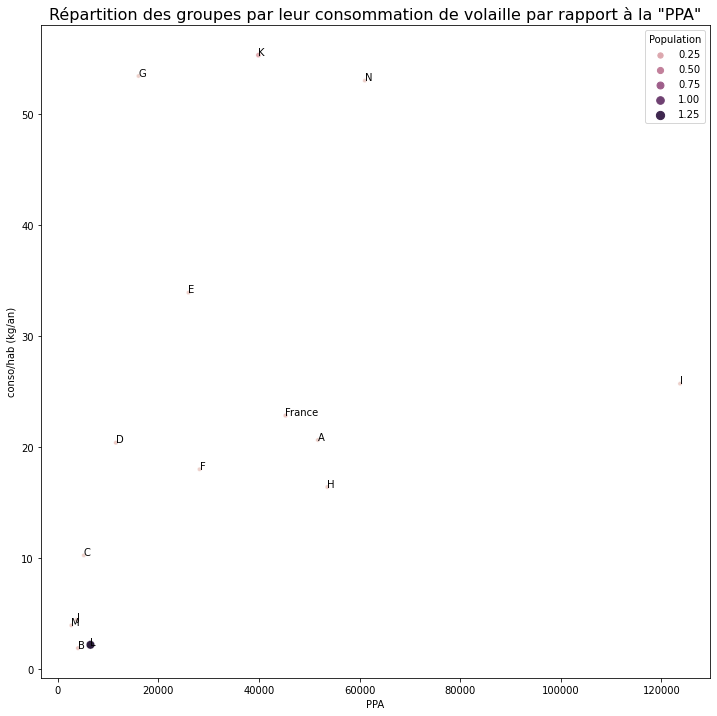

In [67]:
# création de la figure
plt.figure(figsize=(12,12))
sns.scatterplot(data= group, x="PPA", y='conso/hab (kg/an)', size = 'Population', hue = 'Population')

#création des labels
for i, (x,y) in enumerate(zip(group['PPA'], group['conso/hab (kg/an)'])):
  plt.text(x,y,group.index[i])

plt.title('Répartition des groupes par leur consommation de volaille par rapport à la "PPA"',fontsize=16)

plt.savefig('visu groupe PPA.jpg')
plt.show()

Seuls les groupes A, H, I et N ont une PPA supérieure à celle de la France et donc on peut le supposer, seront en capacité d'acheter de la volaille avec des coût de production du marché Français augmenté du coût de l'importation.

In [68]:
Selection = data_2.loc[(data_2['cluster']== 'A')|(data_2['cluster']== 'H')|(data_2['cluster']== 'I')|(data_2['cluster']== 'G')|(data_2['cluster']== 'N'),:]

In [69]:
display(Selection)

,Zone,Population,Stabilité,PPA,conso/hab (kg/an),Prod/hab (kg/hab),Importation (%),cluster,cluster_num
4,Allemagne,83124.418,0.59,53486.8,19.356527,18.213661,0.484186,A,0
6,Antigua-et-Barbuda,96.286,0.84,21017.3,51.928629,0.000000,1.000000,G,6
7,Arabie saoudite,33702.756,-0.62,47630.0,42.578120,18.277437,0.503136,A,0
11,Autriche,8891.388,0.90,55258.4,17.994941,16.645320,0.635838,A,0
13,Bahamas,385.637,0.86,36200.7,41.489795,15.558673,0.923077,G,6
16,Belgique,11482.178,0.40,51139.1,12.541175,40.323360,2.223684,H,7
31,Chine - RAS de Hong-Kong,7371.730,0.78,61055.3,53.040467,3.255681,3.239286,N,13
32,Chine - RAS de Macao,631.636,1.25,132374.0,33.246997,4.749571,1.210526,I,8
33,Chypre,1189.265,0.49,39977.0,25.225665,21.021387,0.368421,A,0
39,Danemark,5752.126,0.95,56178.8,28.858895,30.075836,0.796407,A,0


In [70]:
Selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 4 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zone               31 non-null     object 
 1   Population         31 non-null     float64
 2   Stabilité          31 non-null     float64
 3   PPA                31 non-null     float64
 4   conso/hab (kg/an)  31 non-null     float64
 5   Prod/hab (kg/hab)  31 non-null     float64
 6   Importation (%)    31 non-null     float64
 7   cluster            31 non-null     object 
 8   cluster_num        31 non-null     int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ KB


Nous avons 23 pays sélectionnés comme potentielles opportunités d'exportation. Afin de sélectionner, ou du moins d'identifier les cibles prioritaires parmis ces 23 pays nous allons formuler plusieurs hypothèses:
- H0: l'entreprise souhaite privilégier des pays où la consommation par habitant est élevée et où il y a un fort taux d'importation

- H1 : l'entreprise préfère privilégier les pays avec une forte population et une PPA élevé.

- H2 : l'entreprise souhaite privilégier des pays proches géographiquement et où les importations seront peu taxées.

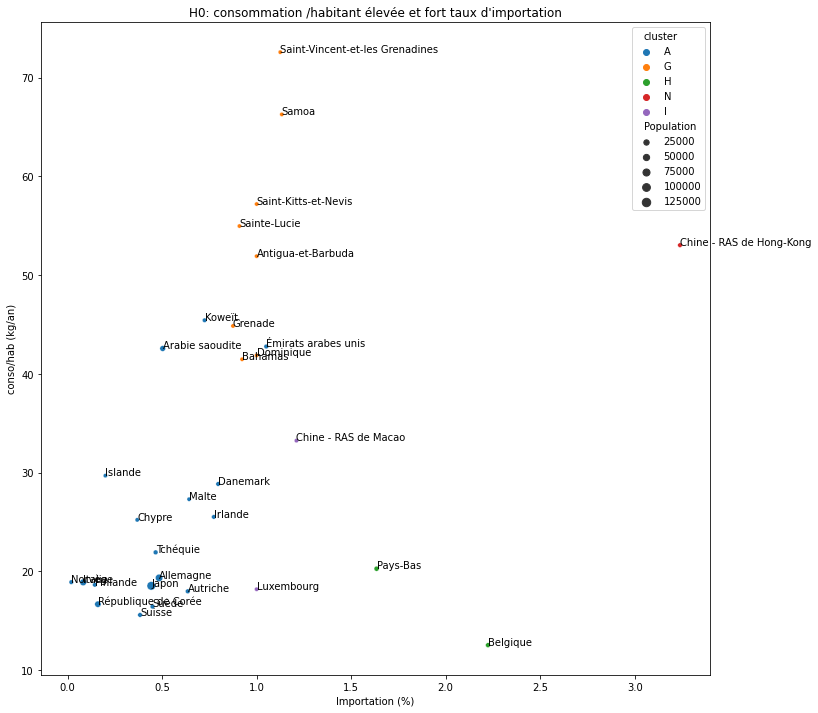

In [81]:
# création de la figure
plt.figure(figsize=(12,12))
sns.scatterplot(data= Selection, x="Importation (%)", y='conso/hab (kg/an)', hue = 'cluster')

#création des labels
for i, (x,y) in enumerate(zip(Selection['Importation (%)'], Selection['conso/hab (kg/an)'])):
  plt.text(x,y,Selection.iloc[i,0])

plt.title("H0: consommation /habitant élevée et fort taux d'importation")

plt.savefig('H0.jpg')

H0 conduirait à privilégier les goupes G, N, I et une partie du goupe A : "Koweit, Arabie Saoudite, Emirats arabes unis"

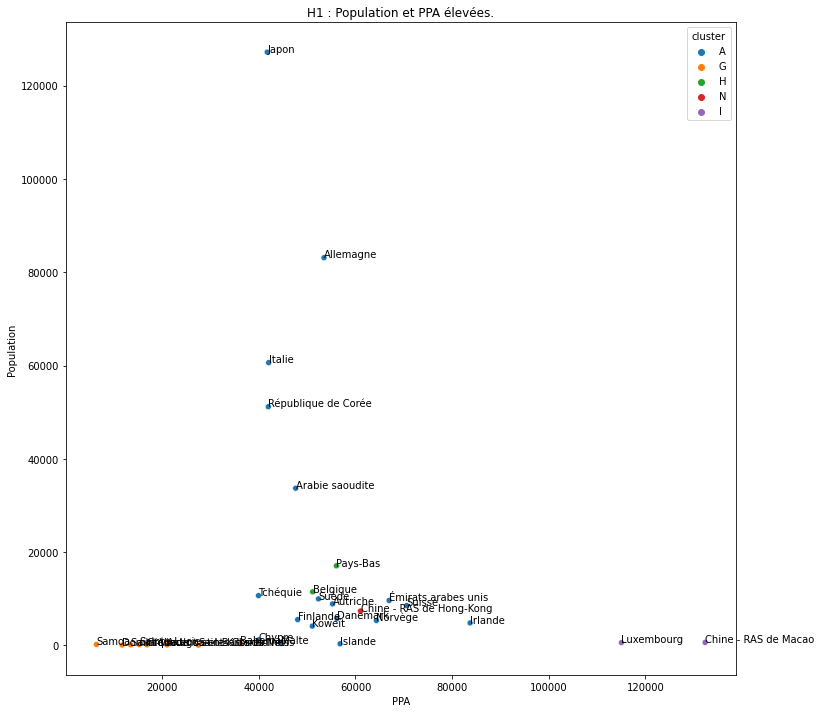

In [85]:
# création de la figure
plt.figure(figsize=(12,12))
sns.scatterplot(data= Selection, x="PPA", y='Population', hue = 'cluster')

#création des labels
for i, (x,y) in enumerate(zip(Selection['PPA'], Selection['Population'])):
  plt.text(x,y,Selection.iloc[i,0])

plt.title("H1 : Population et PPA élevées.")

plt.savefig('H1.jpg')

H1: Conduirait à exclure le groupe G et privilégier soit le goupe I, soit les pays les plus peuplés du groupe A

- H2 : l'entreprise souhaite privilégier des pays proches géographiquement et où les importations seront peu taxées.

In [73]:
temp = pd.read_excel('/content/drive/MyDrive/Cours/Projet 9/projet/test/Schengen.xlsx', header=None)

In [74]:
temp.head()

,0
0,Allemagne
1,Autriche
2,Belgique
3,Croatie
4,Danemark


In [75]:
liste= temp[0].to_list()

In [76]:
Selec= Selection['Zone'].to_list()

In [77]:
Selection_finale = set(liste)&set(Selec)

In [78]:
len(Selection_finale)

13

In [79]:
sorted(Selection_finale)

['Allemagne',
 'Autriche',
 'Belgique',
 'Danemark',
 'Finlande',
 'Islande',
 'Italie',
 'Luxembourg',
 'Malte',
 'Norvège',
 'Pays-Bas',
 'Suisse',
 'Suède']

Compte tenu du fait que:
- la viande est un produit périssable qui nécessite le respect de la chaîne du froid et il serait donc préférable de limiter la distance parcouru afin de limiter les coûts et donc privilégier les pays proches géographiquement.
- l'importation de produits peut être soumis à diverses taxations et/ou normes.

Les pays membres de l'espace Schengen sont soumis aux mêmes normes que la France et comme ils se trouvent en Europe ils sont aussi "proches" géographiquement.

Nous conseillons donc, pour commencer l'activité d'exportation, de privilégier l'un des treize pays suivants:

In [80]:
sorted(Selection_finale)

['Allemagne',
 'Autriche',
 'Belgique',
 'Danemark',
 'Finlande',
 'Islande',
 'Italie',
 'Luxembourg',
 'Malte',
 'Norvège',
 'Pays-Bas',
 'Suisse',
 'Suède']

 *NB: A noter que la République Tchèque devrait faire patie de cette liste, elle ne ressort pas dans la liste car apparaît sous le nom de "Tchéquie" dans le DF.*